<a href="https://colab.research.google.com/github/paul3183/Pyspark_BigData_Udemy/blob/main/05_SECCI%C3%93N07_Spark_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SPARK SQL

In [1]:
# Instalar SDK Java 8

!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Descargar Spark 3.4.3

!wget -q https://archive.apache.org/dist/spark/spark-3.4.3/spark-3.4.3-bin-hadoop3.tgz

# Descomprimir el archivo descargado de Spark

!tar xf spark-3.4.3-bin-hadoop3.tgz

# Establecer las variables de entorno

import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.3-bin-hadoop3"

# Instalar la librería findspark

!pip install -q findspark

# Instalar pyspark

!pip install -q pyspark

# verificar la instalación ###

import findspark

findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

spark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
sc = spark.sparkContext
#Crear un dataframe a partir de un RDD

In [3]:
rdd = sc.parallelize(item for item in range(10)).map(lambda x: (x, x**2))

In [4]:
rdd.collect()

[(0, 0),
 (1, 1),
 (2, 4),
 (3, 9),
 (4, 16),
 (5, 25),
 (6, 36),
 (7, 49),
 (8, 64),
 (9, 81)]

In [5]:
df = rdd.toDF(['número', 'cuadrado'])

In [6]:
df.printSchema()

root
 |-- número: long (nullable = true)
 |-- cuadrado: long (nullable = true)



In [7]:
df.show()

+------+--------+
|número|cuadrado|
+------+--------+
|     0|       0|
|     1|       1|
|     2|       4|
|     3|       9|
|     4|      16|
|     5|      25|
|     6|      36|
|     7|      49|
|     8|      64|
|     9|      81|
+------+--------+



In [8]:
#CREAR un dataframe a partir de un rdd con schema
rdd1 = sc.parallelize([(1, 'Jose', 35.5), (2, 'Teresa', 54.3), (3,'Katia', 12.7)])

In [9]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DoubleType

In [13]:
#primera via o forma:
esquema01 = StructType(
    [
        StructField('id', IntegerType(), True),
        StructField('nombre', StringType(), True),
        StructField('saldo', DoubleType(), True)
    ]
)

In [14]:
#segunda via o forma:
esquema02 = "`id` INT, `nombre` STRING, `saldo` DOUBLE"

In [15]:
df1 = spark.createDataFrame(rdd1, schema=esquema01)

In [16]:
df1.printSchema()

root
 |-- id: integer (nullable = true)
 |-- nombre: string (nullable = true)
 |-- saldo: double (nullable = true)



In [17]:
df1.show()

+---+------+-----+
| id|nombre|saldo|
+---+------+-----+
|  1|  Jose| 35.5|
|  2|Teresa| 54.3|
|  3| Katia| 12.7|
+---+------+-----+



In [18]:
df2 = spark.createDataFrame(rdd1, schema = esquema02)

In [19]:
df2.printSchema()

root
 |-- id: integer (nullable = true)
 |-- nombre: string (nullable = true)
 |-- saldo: double (nullable = true)



In [20]:
df2.show()

+---+------+-----+
| id|nombre|saldo|
+---+------+-----+
|  1|  Jose| 35.5|
|  2|Teresa| 54.3|
|  3| Katia| 12.7|
+---+------+-----+



In [22]:
#CREAR DATAFRAMES A PARTIR DE FUENTES DE DATOS:
#mediante la lectura de un archivo de texto:
df = spark.read.text('./data/dataTXT.txt')

In [ ]:
df.show()

+--------------------+
|               value|
+--------------------+
|Estamos en el cur...|
|En este capítulo ...|
|En esta sección e...|
|y en este ejemplo...|
+--------------------+



In [23]:
df.show(truncate=False)

+-----------------------------------------------------------------------+
|value                                                                  |
+-----------------------------------------------------------------------+
|Estamos en el curso de pyspark                                         |
|En este capítulo estamos estudiando el API SQL de Saprk                |
|En esta sección estamos creado dataframes a partir de fuentes de datos,|
|y en este ejemplo creamos un dataframe a partir de un texto plano      |
+-----------------------------------------------------------------------+



In [25]:
#crear un dataframe mediante la lectura de un csv:
df1 = spark.read.csv('/content/data/dataCSV.csv')

In [ ]:
df1.show()

+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+--------------------+--------------------+
|        _c0|          _c1|                 _c2|                 _c3|        _c4|                 _c5|                 _c6|    _c7|   _c8|     _c9|         _c10|                _c11|             _c12|            _c13|                _c14|                _c15|
+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+--------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|        publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|vid

In [26]:
df1 = spark.read.option('header', 'true').csv('/content/data/dataCSV.csv')

In [27]:
df1.show()

+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|        publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13T17:13:...|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|            False|           Fal

In [29]:
#leer archivo de texto con un delimitador diferente:
df2 = spark.read.option('header', 'true').option('delimiter', '|').csv('/content/data/dataTab.txt')

In [ ]:
df2.show()

+----+----+----------+-----+
|pais|edad|     fecha|color|
+----+----+----------+-----+
|  MX|  23|2021-02-21| rojo|
|  CA|  56|2021-06-10| azul|
|  US|  32|2020-06-02|verde|
+----+----+----------+-----+



In [30]:
#crear un dataframe a partir de un json proporcionando un schema:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DateType

json_schema = StructType(
    [
     StructField('color', StringType(), True),
     StructField('edad', IntegerType(), True),
     StructField('fecha', DateType(), True),
     StructField('pais', StringType(), True)
     ]
)

In [32]:
df4 = spark.read.schema(json_schema).json('/content/data/dataJSON.json')

In [ ]:
df4.show()

+-----+----+----------+----+
|color|edad|     fecha|pais|
+-----+----+----------+----+
| rojo|null|2021-02-21|  MX|
| azul|null|2021-06-10|  CA|
|verde|null|2020-06-02|  US|
+-----+----+----------+----+



In [33]:
df4.printSchema()

root
 |-- color: string (nullable = true)
 |-- edad: integer (nullable = true)
 |-- fecha: date (nullable = true)
 |-- pais: string (nullable = true)



In [40]:
#crear un dataframe a partir de un archivo parquet:
df5 = spark.read.parquet('/content/data/dataPARQUET.parquet')

In [42]:
df5.show()

+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|        publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13T17:13:...|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|            False|           Fal

In [41]:
df6 = spark.read.format('parquet').load('/content/data/dataPARQUET.parquet')

In [43]:
df6.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: string (nullable = true)
 |-- likes: string (nullable = true)
 |-- dislikes: string (nullable = true)
 |-- comment_count: string (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)



In [44]:
df6.show()

+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|        publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13T17:13:...|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|            False|           Fal

#Trabajo con Columnas en SPARK:

In [45]:
df = spark.read.parquet('/content/data/dataPARQUET.parquet')

In [46]:
df.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: string (nullable = true)
 |-- likes: string (nullable = true)
 |-- dislikes: string (nullable = true)
 |-- comment_count: string (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)



In [47]:
#01 primera alternativa para referirnos a las columnas:
df.select('title').show()

+--------------------+
|               title|
+--------------------+
|WE WANT TO TALK A...|
|The Trump Preside...|
|Racist Superman |...|
|Nickelback Lyrics...|
|I Dare You: GOING...|
|2 Weeks with iPho...|
|Roy Moore & Jeff ...|
|5 Ice Cream Gadge...|
|The Greatest Show...|
|Why the rise of t...|
|Dion Lewis' 103-Y...|
|(SPOILERS) 'Shiva...|
|Marshmello - Bloc...|
|Which Countries A...|
|SHOPPING FOR NEW ...|
|    The New SpotMini|
|One Change That W...|
|How does your bod...|
|HomeMade Electric...|
|Founding An Inbre...|
+--------------------+
only showing top 20 rows



In [48]:
#02 segunda alternativa:
from pyspark.sql.functions import col
df.select(col('title')).show()

+--------------------+
|               title|
+--------------------+
|WE WANT TO TALK A...|
|The Trump Preside...|
|Racist Superman |...|
|Nickelback Lyrics...|
|I Dare You: GOING...|
|2 Weeks with iPho...|
|Roy Moore & Jeff ...|
|5 Ice Cream Gadge...|
|The Greatest Show...|
|Why the rise of t...|
|Dion Lewis' 103-Y...|
|(SPOILERS) 'Shiva...|
|Marshmello - Bloc...|
|Which Countries A...|
|SHOPPING FOR NEW ...|
|    The New SpotMini|
|One Change That W...|
|How does your bod...|
|HomeMade Electric...|
|Founding An Inbre...|
+--------------------+
only showing top 20 rows



#TRANSFORMACIONES- FUNCIONES SELECT Y SELECTEXPR (select expression)

In [50]:
#select
df = spark.read.parquet('/content/data02/datos.parquet')

In [ ]:
df.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: timestamp (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)



In [51]:
df.show()

+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|       publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13 17:13:01|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|            False|           False| 

In [52]:
from pyspark.sql.functions import col
df.select(col('video_id')).show()

+-----------+
|   video_id|
+-----------+
|2kyS6SvSYSE|
|1ZAPwfrtAFY|
|5qpjK5DgCt4|
|puqaWrEC7tY|
|d380meD0W0M|
|gHZ1Qz0KiKM|
|39idVpFF7NQ|
|nc99ccSXST0|
|jr9QtXwC9vc|
|TUmyygCMMGA|
|9wRQljFNDW8|
|VifQlJit6A0|
|5E4ZBSInqUU|
|GgVmn66oK_A|
|TaTleo4cOs8|
|kgaO45SyaO4|
|ZAQs-ctOqXQ|
|YVfyYrEmzgM|
|eNSN6qet1kE|
|B5HORANmzHw|
+-----------+
only showing top 20 rows



In [53]:
df.select('video_id', 'trending_date').show()

+-----------+-------------+
|   video_id|trending_date|
+-----------+-------------+
|2kyS6SvSYSE|     17.14.11|
|1ZAPwfrtAFY|     17.14.11|
|5qpjK5DgCt4|     17.14.11|
|puqaWrEC7tY|     17.14.11|
|d380meD0W0M|     17.14.11|
|gHZ1Qz0KiKM|     17.14.11|
|39idVpFF7NQ|     17.14.11|
|nc99ccSXST0|     17.14.11|
|jr9QtXwC9vc|     17.14.11|
|TUmyygCMMGA|     17.14.11|
|9wRQljFNDW8|     17.14.11|
|VifQlJit6A0|     17.14.11|
|5E4ZBSInqUU|     17.14.11|
|GgVmn66oK_A|     17.14.11|
|TaTleo4cOs8|     17.14.11|
|kgaO45SyaO4|     17.14.11|
|ZAQs-ctOqXQ|     17.14.11|
|YVfyYrEmzgM|     17.14.11|
|eNSN6qet1kE|     17.14.11|
|B5HORANmzHw|     17.14.11|
+-----------+-------------+
only showing top 20 rows



In [56]:
#No se puede visualizar, debido a que los strings no soportan este tipo de operación.
df.select(
    'likes',
    'dislikes',
    ('likes'- 'dislikes')
).show()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [57]:
df.select(
    col('likes'),
    col('dislikes'),
    (col('likes')- col('dislikes')).alias('aceptación')
).show()

+------+--------+----------+
| likes|dislikes|aceptación|
+------+--------+----------+
| 57527|    2966|     54561|
| 97185|    6146|     91039|
|146033|    5339|    140694|
| 10172|     666|      9506|
|132235|    1989|    130246|
|  9763|     511|      9252|
| 15993|    2445|     13548|
| 23663|     778|     22885|
|  3543|     119|      3424|
| 12654|    1363|     11291|
|   655|      25|       630|
|  1576|     303|      1273|
|114188|    1333|    112855|
|  7848|    1171|      6677|
|  7473|     246|      7227|
|  9419|      52|      9367|
|  8011|     638|      7373|
|  5398|      53|      5345|
| 11963|      36|     11927|
|  8421|     191|      8230|
+------+--------+----------+
only showing top 20 rows



In [58]:
#selctExpr:
df.selectExpr('likes', 'dislikes', '(likes - dislikes) as aceptacion').show()

+------+--------+----------+
| likes|dislikes|aceptacion|
+------+--------+----------+
| 57527|    2966|     54561|
| 97185|    6146|     91039|
|146033|    5339|    140694|
| 10172|     666|      9506|
|132235|    1989|    130246|
|  9763|     511|      9252|
| 15993|    2445|     13548|
| 23663|     778|     22885|
|  3543|     119|      3424|
| 12654|    1363|     11291|
|   655|      25|       630|
|  1576|     303|      1273|
|114188|    1333|    112855|
|  7848|    1171|      6677|
|  7473|     246|      7227|
|  9419|      52|      9367|
|  8011|     638|      7373|
|  5398|      53|      5345|
| 11963|      36|     11927|
|  8421|     191|      8230|
+------+--------+----------+
only showing top 20 rows



In [59]:
df.selectExpr('count(distinct(video_id)) as numero_videos').show()

+-------------+
|numero_videos|
+-------------+
|         6837|
+-------------+



#FUNCIONES FILTER Y WHERE:

In [64]:
df = spark.read.parquet('/content/data02/datos.parquet')

In [65]:
#filter:
from pyspark.sql.functions import col

In [66]:
df.show()

+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|       publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13 17:13:01|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|            False|           False| 

In [67]:
df.filter(col('video_id') == '2kyS6SvSYSE').show()

+-----------+-------------+--------------------+-------------+-----------+-------------------+---------------+-------+-----+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|channel_title|category_id|       publish_time|           tags|  views|likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+-------------+-----------+-------------------+---------------+-------+-----+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...| CaseyNeistat|         22|2017-11-13 17:13:01|SHANtell martin| 748374|57527|    2966|        15954|https://i.ytimg.c...|            False|           False|                 False|SHANTELL'S CHANNE...|
|2kyS6Sv

In [68]:
#where:
df1 = spark.read.parquet('/content/data02/datos.parquet').where(col('trending_date') != '17.14.11')

In [69]:
df1.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|            video_id|       trending_date|               title|       channel_title|         category_id|       publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|\nCook with confi...|             recipes|              videos| and restaurant g...| dining destinations|               null|                

In [70]:
df2 = spark.read.parquet('/content/data02/datos.parquet').where(col('likes') > 5000)

In [71]:
df2.show()

+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|       publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13 17:13:01|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|            False|           False| 

In [72]:
df2.filter((col('trending_date') != '17.14.11') & (col('likes') > 7000)).show()

+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|       publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|YvfYK0EEhK4|     17.15.11|Brent Pella - Why...|         Brent Pella|         23|2017-11-14 15:32:51|"spirit airlines"...| 462490| 14132|     795|          666|https://i.ytimg.c...|            False|           False| 

In [73]:
#lo mismo usando 2 filters:
df2.filter(col('trending_date') != '17.14.11').filter(col('likes') > 7000).show()

+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|       publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|YvfYK0EEhK4|     17.15.11|Brent Pella - Why...|         Brent Pella|         23|2017-11-14 15:32:51|"spirit airlines"...| 462490| 14132|     795|          666|https://i.ytimg.c...|            False|           False| 

#FUNCIÓN DISTINCT Y DROPDUPLICATES

In [76]:
df = spark.read.parquet('./data02')

In [77]:
#Distinct:
df_sin_duplicados = df.distinct()

In [78]:
df_sin_duplicados.show()

+-----------+-------------+--------------------+-------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|      channel_title|category_id|       publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+-------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2XK4omx9uMU|     17.14.11|Camila Cabello CO...|         Capital FM|         10|2017-11-10 14:40:32|"capitalfmofficia...| 836544| 40195|     373|          976|https://i.ytimg.c...|            False|           False|     

In [79]:
print(f'el conteo del dataframe original es: {df.count()}')
print(f'el conteo del dataframe sin duplicados es: {df_sin_duplicados.count()}')

el conteo del dataframe original es: 48137
el conteo del dataframe sin duplicados es: 41428


In [82]:
#función dropDuplicate:
dataframe = spark.createDataFrame([(1, 'azul', 567), (2, 'rojo', 487), (1, 'azul', 345), (2, 'verde', 783)]).toDF('id', 'color', 'importe')

In [83]:
dataframe.show()

+---+-----+-------+
| id|color|importe|
+---+-----+-------+
|  1| azul|    567|
|  2| rojo|    487|
|  1| azul|    345|
|  2|verde|    783|
+---+-----+-------+



In [84]:
dataframe.dropDuplicates(['id', 'color']).show()

+---+-----+-------+
| id|color|importe|
+---+-----+-------+
|  1| azul|    567|
|  2| rojo|    487|
|  2|verde|    783|
+---+-----+-------+



In [85]:
#en terminos de rendimiento no hay diferencias entre estos dos enfoques.
#debemos seleccionar a criterio según el problema.

#FUNCIONES SORT Y ORDERBY

In [86]:
from pyspark.sql.functions import col
df = (spark.read.parquet('/content/data02/datos.parquet')).select(col('likes'), col('views'), col('video_id'), col('dislikes')).dropDuplicates(['video_id'])

In [87]:
df.show()

+------+-------+--------------------+--------+
| likes|  views|            video_id|dislikes|
+------+-------+--------------------+--------+
| 63995|1525400|         bAkEd8r7Nnw|     896|
|   427|   9036|         eijd-yjXY9E|      14|
|  4145| 318249|         npcqBt_e4k0|     110|
|  6669| 203615|         LeWtF5y9-6Q|     136|
|  2166| 104499|         GhcqN2FDAnA|    1066|
| 10834| 160196|         v_CMMWCN5nQ|     162|
| 36068| 962042|         R8WBN3fJmwM|     845|
|   982|  36848|         oKuPJ7zF0_k|       6|
| 26482| 713615|         B3JFSL8AA70|    2443|
|275632|2822642|         f6Egj7ncOi8|    1444|
| 23922| 321885|         8gE6cek7F30|     317|
|    70|  13670|         EdkK29-TWJk|       1|
|  1131| 120802|         8szK9FBpdPI|      92|
| 12355| 294080|         6gFj1XJ6b5o|      80|
|  null|   null|\nhttp://www.Mast...|    null|
| 12070| 233766|         wOFuVNiAJQQ|     117|
| 21067| 210371|         PpElRBQ-yGc|     135|
|  4609| 363194|         q11UD-6XT-8|     955|
|   188|  311

In [89]:
#sort:
#salen nulls  porque por defecto lo esta ordenando en forma ascendente.
df.sort('likes').show()

+-----+-----+--------------------+--------+
|likes|views|            video_id|dislikes|
+-----+-----+--------------------+--------+
| null| null|\nFor more videos...|    null|
| null| null|\nFashion Editor:...|    null|
| null| null|\nAccess Hollywoo...|    null|
| null| null|\nStill haven’t s...|    null|
| null| null|\nhttps://www.you...|    null|
| null| null|Horror Outro ► ht...|    null|
| null| null|\nChapped lips ar...|    null|
| null| null|\nRoar: https://w...|    null|
| null| null|\nThe leading int...|    null|
| null| null|             \nToday|    null|
| null| null|\nONE STRANGE ROC...|    null|
| null| null|\nSNAPCHAT: fishi...|    null|
| null| null|\nInstagram: http...|    null|
| null| null|\nInstagram.com/w...|    null|
| null| null|\n5050 State Hwy....|    null|
| null| null|\nSIGN UP FOR BRA...|    null|
| null| null|\nJames Ambler an...|    null|
| null| null|\nhttp://www.Mast...|    null|
| null| null|\nEver After Tuto...|    null|
| null| null|          \nEvelin 

In [90]:
from pyspark.sql.functions import desc

In [92]:
df.sort(desc('likes')).show()
#resultado mas informativo.

+-------+--------+-----------+--------+
|  likes|   views|   video_id|dislikes|
+-------+--------+-----------+--------+
|3880071|39349927|7C2z4GqqS5E|   72707|
|2055137|13945717|kTlv5_Bs8aw|   23888|
|2050527|10695328|OK3GJ0WIQ8s|   14711|
|1956202|10666323|p8npDG2ulKQ|   13966|
|1735895|37736281|6ZfuNTqbHE8|   21969|
|1634124|33523622|2Vv-BfVoq4g|   21082|
|1572997| 7518332|kX0vO4vlJuU|    8113|
|1437859| 5884233|D_6QmL6rExk|    6390|
|1405355|31648454|VYOjWnS4cMY|   51547|
|1401915| 5275672|8O_MwlZ2dEg|    6268|
|1386616|15873034|ffxKSjUwKdU|   40714|
|1366736|16884972|J2HytHu5VBI|   59930|
|1290509| 6416697|2tDKp41nrw8|    4358|
|1207457|13754992|_5d-sQ7Fh5M|  280675|
|1167488| 8041970|oWjxSkJpxFU|  147643|
|1149185|24782158|FlsCjmMhFmw|  483924|
|1111592|38873543|i0p1bmr0EmE|   96407|
|1065777|14089954|dfnCAmr569k|   47839|
| 983693|14820746|tCXGJQYZ9JA|   44254|
| 975715|19716689|QwievZ1Tx-8|    9118|
+-------+--------+-----------+--------+
only showing top 20 rows



In [93]:
#función ORDERBY:
df.orderBy(col('views')).show()

+-----+-----+--------------------+--------+
|likes|views|            video_id|dislikes|
+-----+-----+--------------------+--------+
| null| null|\nIMDB - http://w...|    null|
| null| null|\nThis is the fir...|    null|
| null| null|\nAccess Hollywoo...|    null|
| null| null|\nStill haven’t s...|    null|
| null| null|\nhttps://www.you...|    null|
| null| null|          \nEvelin 7|    null|
| null| null|Horror Outro ► ht...|    null|
| null| null|\nChapped lips ar...|    null|
| null| null|\nRoar: https://w...|    null|
| null| null|\nThe leading int...|    null|
| null| null|             \nToday|    null|
| null| null|\nONE STRANGE ROC...|    null|
| null| null|\nSNAPCHAT: fishi...|    null|
| null| null|\nInstagram: http...|    null|
| null| null|\nInstagram.com/w...|    null|
| null| null|\n5050 State Hwy....|    null|
| null| null|\nFor more videos...|    null|
| null| null|\nJames Ambler an...|    null|
| null| null|\nFashion Editor:...|    null|
| null| null|\nEver After Tuto..

In [95]:
df.orderBy(col('views').desc()).show()

+-------+--------+-----------+--------+
|  likes|   views|   video_id|dislikes|
+-------+--------+-----------+--------+
| 609101|48431654|-BQJo3vK8O8|   52259|
|3880071|39349927|7C2z4GqqS5E|   72707|
|1111592|38873543|i0p1bmr0EmE|   96407|
|1735895|37736281|6ZfuNTqbHE8|   21969|
|1634124|33523622|2Vv-BfVoq4g|   21082|
|1405355|31648454|VYOjWnS4cMY|   51547|
| 850362|27973210|u9Mv98Gr5pY|   26541|
|1149185|24782158|FlsCjmMhFmw|  483924|
| 641546|24421448|U9BwWKXjVaI|   16517|
| 587326|23758250|1J76wN0TPI4|   18799|
|      0|20921796|BhIEIO0vaBE|       0|
| 975715|19716689|QwievZ1Tx-8|    9118|
| 511753|18639195|rRr1qiJRsXk|   15606|
| 754791|18195959|rRzxEiBLQCA|   65326|
| 399200|18184886|vn9mMeWcgoM|   17473|
| 787419|17158531|n1WpP7iowLc|   43420|
|1366736|16884972|J2HytHu5VBI|   59930|
|1386616|15873034|ffxKSjUwKdU|   40714|
| 278743|15006579|yDiXQl7grPQ|   13599|
| 983693|14820746|tCXGJQYZ9JA|   44254|
+-------+--------+-----------+--------+
only showing top 20 rows



In [96]:
#mezcla de ordenes:
dataframe = spark.createDataFrame([(1,'azul', 568), (2,'rojo',235), (1, 'azul', 456), (2, 'azul', 783)]).toDF('id', 'color', 'importe')

In [97]:
dataframe.show()

+---+-----+-------+
| id|color|importe|
+---+-----+-------+
|  1| azul|    568|
|  2| rojo|    235|
|  1| azul|    456|
|  2| azul|    783|
+---+-----+-------+



In [98]:
dataframe.orderBy(col('color').desc(), col('importe')).show()

+---+-----+-------+
| id|color|importe|
+---+-----+-------+
|  2| rojo|    235|
|  1| azul|    456|
|  1| azul|    568|
|  2| azul|    783|
+---+-----+-------+



In [99]:
#Función limit:
top_10 = df.orderBy(col('views').desc()).limit(10)

In [100]:
top_10.show()

+-------+--------+-----------+--------+
|  likes|   views|   video_id|dislikes|
+-------+--------+-----------+--------+
| 609101|48431654|-BQJo3vK8O8|   52259|
|3880071|39349927|7C2z4GqqS5E|   72707|
|1111592|38873543|i0p1bmr0EmE|   96407|
|1735895|37736281|6ZfuNTqbHE8|   21969|
|1634124|33523622|2Vv-BfVoq4g|   21082|
|1405355|31648454|VYOjWnS4cMY|   51547|
| 850362|27973210|u9Mv98Gr5pY|   26541|
|1149185|24782158|FlsCjmMhFmw|  483924|
| 641546|24421448|U9BwWKXjVaI|   16517|
| 587326|23758250|1J76wN0TPI4|   18799|
+-------+--------+-----------+--------+



#FUNCIONES WITHCOLUMN Y WITHCOLUMNRENAMED

In [101]:
df = spark.read.parquet('./data02/')

In [102]:
#withColumn:
from pyspark.sql.functions import col

In [103]:
df_valoracion = df.withColumn('valoracion', col('likes') - col('dislikes'))

In [104]:
df_valoracion.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: timestamp (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)
 |-- valoracion: integer (nullable = true)



In [107]:
df_valoracion1 = (df.withColumn('valoracion', col('likes') - col('dislikes'))
                  .withColumn('res_div', col('valoracion') % 10)
                  )

In [108]:
df_valoracion1.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: timestamp (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)
 |-- valoracion: integer (nullable = true)
 |-- res_div: integer (nullable = true)



In [109]:
df_valoracion1.select(col('likes'), col('dislikes'), col('valoracion'), col('res_div')).show()

+------+--------+----------+-------+
| likes|dislikes|valoracion|res_div|
+------+--------+----------+-------+
| 57527|    2966|     54561|      1|
| 97185|    6146|     91039|      9|
|146033|    5339|    140694|      4|
| 10172|     666|      9506|      6|
|132235|    1989|    130246|      6|
|  9763|     511|      9252|      2|
| 15993|    2445|     13548|      8|
| 23663|     778|     22885|      5|
|  3543|     119|      3424|      4|
| 12654|    1363|     11291|      1|
|   655|      25|       630|      0|
|  1576|     303|      1273|      3|
|114188|    1333|    112855|      5|
|  7848|    1171|      6677|      7|
|  7473|     246|      7227|      7|
|  9419|      52|      9367|      7|
|  8011|     638|      7373|      3|
|  5398|      53|      5345|      5|
| 11963|      36|     11927|      7|
|  8421|     191|      8230|      0|
+------+--------+----------+-------+
only showing top 20 rows



In [110]:
#withColumnRenamed:
df_renombrado = df.withColumnRenamed('video_id', 'id')

In [111]:
df_renombrado.printSchema()

root
 |-- id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: timestamp (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)



In [114]:
# debemos tener en cuenta que cuando renombramos una columna no existente, esta
# función no ejecuta nada, mas bien nos devuelve el mismo df original.
df_error = df.withColumnRenamed('nombre_que_no_existe', 'otro_nombre')

In [115]:
df_error.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: timestamp (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)



#FUNCIONES DROP, SAMPLE Y RANDOMSPLIT

In [116]:
df = spark.read.parquet('./data02/')

In [117]:
#drop:
df.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: timestamp (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)



In [118]:
df_util = df.drop('comments_disabled')

In [119]:
df_util.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: timestamp (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)



In [124]:
df_util = df.drop('comments_disabled', 'ratings_disabled', 'thumbnail_link')

In [125]:
df_util.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: timestamp (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)



In [128]:
# Si le pasamos una columna que no existe, esta función no genera error sino
# que hace caso omiso y continua su proceso.
df_util = df.drop('comments_disabled', 'ratings_disabled', 'thumbnail_link','cafe')

In [129]:
df_util.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: timestamp (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)



In [130]:
#sample:
df_muestra = df.sample(0.8)

In [131]:
num_filas = df.count()
num_filas_muestra = df_muestra.count()
print(num_filas)
print(num_filas_muestra)

48137
38512


In [132]:
print(f'el 80% de filas del dataframe original es: {num_filas*0.8}')
print(f'el número de filas del dataframe muestra es: {num_filas_muestra}')

el 80% de filas del dataframe original es: 38509.6
el número de filas del dataframe muestra es: 38512


In [133]:
#como vemos nos da un valor muy cercano.

In [134]:
df_muestra = df.sample(fraction=0.8, seed = 1234)

In [135]:
df_muestra = df.sample(withReplacement=True, fraction=0.8, seed=1234)

In [136]:
#randomSplit:
#se usa para entrenar modelos de machine learning
# se le da una lista de un conjunto de pesos que sumen 1, es decir el 80% de las
# filas se asignaran al dataframe train y el 20% de las filas irán al dataframe
# test
train, test = df.randomSplit([0.8, 0.2], seed=1234)

#TRABAJO CON DATOS INCORRECTOS O FALTANTES

In [137]:
df = spark.read.parquet('./data02/')

In [138]:
df.count()

48137

In [141]:
#primera forma:
df.na.drop().count()

40379

In [142]:
#segunda forma:
df.na.drop('any').count()

40379

In [144]:
#tercera forma:
df.dropna().count()

40379

In [145]:
#focalizandonos en una sola columna:
df.na.drop(subset=['views']).count()

40949

In [146]:
#con varias columnas:
df.na.drop(subset=['views', 'dislikes']).count()

40949

In [147]:
#rellenando con valores que necesitamos:
df.orderBy(col('views')).select(col('views'), col('likes'), col('dislikes')).show()

+-----+-----+--------+
|views|likes|dislikes|
+-----+-----+--------+
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
+-----+-----+--------+
only showing top 20 rows



In [149]:
df.fillna(0, subset=['likes', 'dislikes']).orderBy(col('views')).select(col('views'), col('likes'), col('dislikes')).show()

+-----+-----+--------+
|views|likes|dislikes|
+-----+-----+--------+
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
+-----+-----+--------+
only showing top 20 rows



#ACCIONES SOBRE UN DATAFRAME EN SPARK SQL

In [150]:
df = spark.read.parquet('./data02/')

In [151]:
#show():
df.show()

+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|       publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13 17:13:01|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|            False|           False| 

In [152]:
df.show(5)

+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|       publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13 17:13:01|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|            False|           False| 

In [153]:
df.show(5, truncate=False)

+-----------+-------------+--------------------------------------------------------------+---------------------+-----------+-------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------+------+--------+-------------+----------------------------------------------+-----------------+----------------+----------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [155]:
#take:
df.take(1)

[Row(video_id='2kyS6SvSYSE', trending_date='17.14.11', title='WE WANT TO TALK ABOUT OUR MARRIAGE', channel_title='CaseyNeistat', category_id='22', publish_time=datetime.datetime(2017, 11, 13, 17, 13, 1), tags='SHANtell martin', views=748374, likes=57527, dislikes=2966, comment_count=15954, thumbnail_link='https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg', comments_disabled='False', ratings_disabled='False', video_error_or_removed='False', description="SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\\nCANDICE - https://www.lovebilly.com\\n\\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\\nwith this lens -- http://amzn.to/2rUJOmD\\nbig drone - http://tinyurl.com/h4ft3oy\\nOTHER GEAR ---  http://amzn.to/2o3GLX5\\nSony CAMERA http://amzn.to/2nOBmnv\\nOLD CAMERA; http://amzn.to/2o2cQBT\\nMAIN LENS; http://amzn.to/2od5gBJ\\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\\nYOU NEED T

In [156]:
#head:
df.head(1)

[Row(video_id='2kyS6SvSYSE', trending_date='17.14.11', title='WE WANT TO TALK ABOUT OUR MARRIAGE', channel_title='CaseyNeistat', category_id='22', publish_time=datetime.datetime(2017, 11, 13, 17, 13, 1), tags='SHANtell martin', views=748374, likes=57527, dislikes=2966, comment_count=15954, thumbnail_link='https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg', comments_disabled='False', ratings_disabled='False', video_error_or_removed='False', description="SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\\nCANDICE - https://www.lovebilly.com\\n\\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\\nwith this lens -- http://amzn.to/2rUJOmD\\nbig drone - http://tinyurl.com/h4ft3oy\\nOTHER GEAR ---  http://amzn.to/2o3GLX5\\nSony CAMERA http://amzn.to/2nOBmnv\\nOLD CAMERA; http://amzn.to/2o2cQBT\\nMAIN LENS; http://amzn.to/2od5gBJ\\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\\nYOU NEED T

In [157]:
#collect:
# se debe tener cuidado, pues si los datos son demasiados grandes, puede causar
# un error de desborde de memoria
df.select(col('likes')).collect()


[Row(likes=57527),
 Row(likes=97185),
 Row(likes=146033),
 Row(likes=10172),
 Row(likes=132235),
 Row(likes=9763),
 Row(likes=15993),
 Row(likes=23663),
 Row(likes=3543),
 Row(likes=12654),
 Row(likes=655),
 Row(likes=1576),
 Row(likes=114188),
 Row(likes=7848),
 Row(likes=7473),
 Row(likes=9419),
 Row(likes=8011),
 Row(likes=5398),
 Row(likes=11963),
 Row(likes=8421),
 Row(likes=9586),
 Row(likes=3585),
 Row(likes=11758),
 Row(likes=1707),
 Row(likes=4884),
 Row(likes=8676),
 Row(likes=4687),
 Row(likes=9033),
 Row(likes=156),
 Row(likes=715),
 Row(likes=4035),
 Row(likes=119),
 Row(likes=787419),
 Row(likes=3781),
 Row(likes=1661),
 Row(likes=2486),
 Row(likes=7515),
 Row(likes=1318),
 Row(likes=38397),
 Row(likes=6927),
 Row(likes=5389),
 Row(likes=308),
 Row(likes=7),
 Row(likes=15186),
 Row(likes=4451),
 Row(likes=33505),
 Row(likes=3417),
 Row(likes=2017),
 Row(likes=35),
 Row(likes=45406),
 Row(likes=99086),
 Row(likes=205),
 Row(likes=15397),
 Row(likes=None),
 Row(likes=None),

#ESCRITURA DE DATAFRAMES EN SPARK

In [158]:
df = spark.read.parquet('./data02/')

In [159]:
#lo creamos con 2 particiones:
df1 = df.repartition(2)

In [160]:
df1.write.format('csv').option('sep', '|').save('./output/csv')

In [161]:
#disminuimos a 1 partición:
df1.coalesce(1).write.format('csv').option('sep', '|').save('./output/csv1')

In [162]:
df.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: timestamp (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)



In [163]:
df.select('comments_disabled').distinct().show()

+-----------------+
|comments_disabled|
+-----------------+
|            False|
|             null|
| sports and more.|
|          Wiz Kid|
|             True|
|         farfalle|
+-----------------+



In [164]:
from pyspark.sql.functions import col
df_limpio = df.filter(col('comments_disabled').isin('True', 'False'))

In [165]:
df_limpio.write.partitionBy('comments_disabled').parquet('./output/parquet')

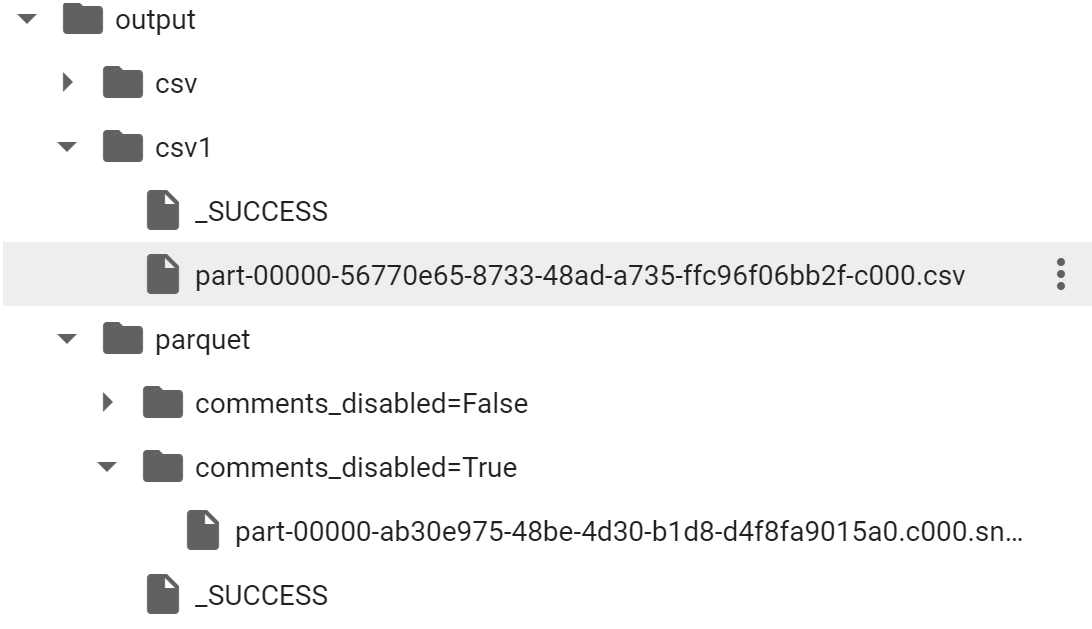